In [1]:
import pandas as pd
import numpy as np


1.将下面的字典创建为Dataframe

In [10]:
data = {"grammer":["Python","C","Ruby",np.nan,"Java","JavaScript","Python"],
            "score":[1,2,np.nan,4,5,6,10]}


In [11]:
df = pd.DataFrame(data)

In [12]:
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Ruby,NaN
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


2.提取有字符串python的行

In [14]:
df[df['grammer']=="Python"] # 法1

,grammer,score
0,Python,1.0
6,Python,10.0


In [16]:
result = df['grammer'].str.contains("Python")  # 转换成字符串 法2
result.fillna(value=False, inplace = True)  # 做一个df来放它
df[result]

,grammer,score
0,Python,1.0
6,Python,10.0


3.输出df的所有列名

In [17]:
print(df.columns)

Index(['grammer', 'score'], dtype='object')


4.修改列二名为'popularity'

In [19]:
df.rename(columns = {"score":"popularity"}, inplace = True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,NaN
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


5.统计grammer列中每种编程语言出现次数

In [20]:
df["grammer"].value_counts()

Python        2
Ruby          1
Java          1
JavaScript    1
C             1
Name: grammer, dtype: int64

6.将空值用上下值的平均值填充

In [23]:
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())  # this word means insert
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,3.0
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


7.提取popularity列中值大于3的行

In [24]:
df[df["popularity"]>3]

,grammer,popularity
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0
6,Python,10.0


8.按照grammer列进行去除重复值

In [25]:
df.drop_duplicates(["grammer"])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Ruby,3.0
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0


9.计算popularity列平均值

In [26]:
df["popularity"].mean()

4.428571428571429

10.将grammer转换为list

In [27]:
df["grammer"].to_list()

['Python', 'C', 'Ruby', nan, 'Java', 'JavaScript', 'Python']

11.将DataFrame保存为EXCEL

In [28]:
df.to_excel("test.xlsx") # 已经出现在同一个文件夹下

12.查看数据行列数

In [29]:
df.shape  # 7行2列

(7, 2)

13.提取popularity列值大于3小于等于7的行

In [30]:
df[(df["popularity"]>3)&(df["popularity"]<=7)]

,grammer,popularity
3,NaN,4.0
4,Java,5.0
5,JavaScript,6.0


In [31]:
df["popularity"]>3   # 这段代码是为了说明一层df做判断就是判断T or F，两层df就是把判断为真的表格部分进行抽取

0    False
1    False
2    False
3     True
4     True
5     True
6     True
Name: popularity, dtype: bool

14.交换两列位置

In [32]:
# 方法1
cols = df.columns[[1,0]]   
df = df[cols]
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


In [34]:
# 方法2
tmp = df['popularity']
df.drop(labels = ['popularity'], axis = 1, inplace = True)  # 删除第二列
df.insert(0, 'popularity', tmp) # 在第一列前面插入第一列
df

y:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


15.提取popularity列最大值所在行

In [35]:
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
6,10.0,Python


16.查看最后5行数据

In [36]:
df.tail(5)

,popularity,grammer
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,10.0,Python


17.删除最后一行数据

In [37]:
df.drop([len(df)-1], inplace=True)    # len(df)就是行数
df

y:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript


18.添加一行数据['Perl',6.6]

In [47]:
row = {'grammer':'Perl','popularity':6.6}    # 字典用大括弧
df = df.append(row, ignore_index = True) #忽略原来的索引
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,6.6,Perl


19.对数据按照'popularity'列值的大小进行排序

In [49]:
df.sort_values("popularity", inplace = True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Ruby
3,4.0,NaN
4,5.0,Java
5,6.0,JavaScript
6,6.6,Perl


20.统计grammer列每个字符串的长度

In [50]:
df["grammer"] = df["grammer"].fillna("R")  # 因为df里面有NaN无法统计长度，所以随便补了一个值
df["len_str"] = df["grammer"].map(lambda x:len(x)) # 新建了一列来记录字符串长度 lambda 是一个特殊函数
# map是用于映射的函数，可以将某段数据映射到其他的地方；也有批量应用 lambda 的功效
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Ruby,4
3,4.0,R,1
4,5.0,Java,4
5,6.0,JavaScript,10
6,6.6,Perl,4


21.读取本地EXCEL\CSV\html数据

In [55]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") # 大部分类型的文件都能read，read_excel也可以
# csv 在外面叫做 Microsoft excel 逗号分隔文件 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


22.查看数据前五行

In [56]:
df.head()  # df.read(100) 查看前100行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


23.将Fare列数据转换为最大值最小值的平均值 (这题老师的答案报错，说是int不能split，估计是有点问题)

In [ ]:
import re      # 正则表达式
def func(df):
    lst = df['Fare'].split('-')
    smin = int(lst[0].strip('k'))
    smax = int(lst[1].strip('k'))
    df['Fare'] = int((smin+smax)/2*1000)
    return df
df = df.apply(func, axis=1)     # apply是用来apply function的
df

24.将数据根据性别分组并计算平均的各种数值

In [59]:
print(df.groupby('Sex').mean())

        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  


24 举一反三：将数据根据兄弟姐妹数量分组并计算平均的各种数值

In [60]:
print(df.groupby('SibSp').mean())
# 兄弟姐妹少的死的少、舱室好、人更老

       PassengerId  Survived    Pclass        Age     Parch       Fare
SibSp                                                                 
0       455.370066  0.345395  2.351974  31.397558  0.185855  25.692028
1       439.727273  0.535885  2.057416  30.089727  0.655502  44.147370
2       412.428571  0.464286  2.357143  22.620000  0.642857  51.753718
3       321.562500  0.250000  2.562500  13.916667  1.312500  68.908862
4       381.611111  0.166667  3.000000   7.055556  1.500000  31.855556
5       336.800000  0.000000  3.000000  10.200000  2.000000  46.900000
8       481.714286  0.000000  3.000000        NaN  2.000000  69.550000


25.将create Time列时间转换为月-日

In [ ]:
for i in range(len(df)):
    df.ix[i,0] = df.ix[i,0].to_pydatetime().strftime("%m-%d")  # %y-%m-%d
df.head
 
# ix 方法可能因为版本问题失效，ix 是专门用于表格切片的函数

26.查看索引、数据类型和内存信息

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


27.查看数值型列的汇总统计

In [63]:
df.describe()    # std 是方差

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


28.新增一列根据Age将数据分为四组

In [72]:
bins = [0, 18, 30, 60, 80]
group_names = ['未成年','壮年','中年','老年']
df['category'] = pd.cut(df['Age'], bins, labels = group_names)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,壮年
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,中年
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,壮年
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,中年
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,中年
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,中年
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,未成年
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,壮年
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,未成年


28之举一反三：将12与7换位子

In [74]:
cols = df.columns[[0,1,2,3,4,5,6,12,8,9,10,11,7]]
df = df[cols]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,category,Ticket,Fare,Cabin,Embarked,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,壮年,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,中年,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,壮年,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,中年,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,中年,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,壮年,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,壮年,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,NaN,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,壮年,111369,30.0000,C148,C,0


29.按照Fare对数据降序排序

In [75]:
df.sort_values('Fare', ascending = False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,category,Ticket,Fare,Cabin,Embarked,Parch
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,中年,PC 17755,512.3292,NaN,C,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,中年,PC 17755,512.3292,B101,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,中年,PC 17755,512.3292,B51 B53 B55,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,壮年,19950,263.0000,C23 C25 C27,S,2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,壮年,19950,263.0000,C23 C25 C27,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,NaN,112052,0.0000,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,NaN,239853,0.0000,NaN,S,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,中年,19972,0.0000,NaN,S,0
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,NaN,239855,0.0000,NaN,S,0


30.取出第33行数据

In [76]:
df.loc[32]

PassengerId                          33
Survived                              1
Pclass                                3
Name           Glynn, Miss. Mary Agatha
Sex                              female
Age                                 NaN
SibSp                                 0
category                            NaN
Ticket                           335677
Fare                               7.75
Cabin                               NaN
Embarked                              Q
Parch                                 0
Name: 32, dtype: object

31.计算Fare列的中位数

In [77]:
np.median(df['Fare'])

14.4542

32.绘制船票频率和年龄的分布直方图

<AxesSubplot:ylabel='Frequency'>

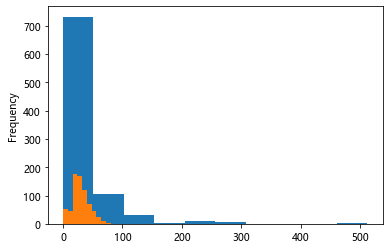

In [82]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
df.Fare.plot(kind = 'hist')
df.Age.plot(kind = 'hist')  # the orange one

33.绘制船票和年龄的密度曲线

<AxesSubplot:ylabel='Density'>

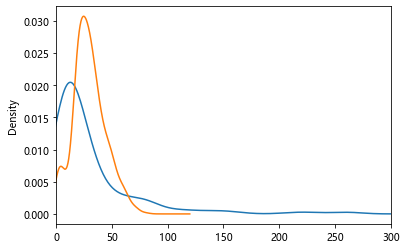

In [83]:
# 这图画起来要比上一张慢不少
df.Fare.plot(kind = 'kde', xlim = (0, 300))  # xlim可以规定范围
df.Age.plot(kind = 'kde')

34.删除最后一列categories

In [84]:
del df['category']

35.将 SibSp和 Cabin 两列合并为新一列 SibSp_Cabin， 中间分隔符用下划线

In [95]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") 

df['SibSp'] = df['SibSp'].map(lambda x:str(x))
df['SibSp_Cabin'] = df['SibSp'].str.cat(df['Cabin'], sep = '_')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0_B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0_C148


36.给某列的每行加上一个字符串，比如给Fare加上单位 Pounds

In [96]:
df['temp'] = 'pounds'
df['Fare'] = df['Fare'].astype('str')
#  df['Fare'] = df['Fare'].map(lambda x:str(x))  数据类型转换的两种方法
df['Fare'] = df['Fare'].str.cat(df['temp'], sep =" ")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin,temp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN,pounds
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85,pounds
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN,pounds
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123,pounds
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN,pounds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0 pounds,NaN,S,NaN,pounds
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0 pounds,B42,S,0_B42,pounds
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45 pounds,NaN,S,NaN,pounds
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148,pounds


In [99]:
del df['temp']   # 别忘了删掉暂时的 pounds 那一列
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN


37.计算Age最大值与最小值之差

In [100]:
df[['Age']].apply(lambda x:x.max()-x.min())

Age    79.58
dtype: float64

In [ ]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") 

38.将第一行和最后一行拼接

In [103]:
pd.concat([df[:1],df[-2:-1]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148


39.将第8行的数据添加到末尾

In [104]:
df.append(df.iloc[7])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25 pounds,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833 pounds,C85,C,1_C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925 pounds,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1 pounds,C123,S,1_C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05 pounds,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0 pounds,B42,S,0_B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45 pounds,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0 pounds,C148,C,0_C148
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75 pounds,NaN,Q,NaN


40.查看每一列的数据类型

In [105]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp           object
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
SibSp_Cabin     object
dtype: object

41.将Age列设置为索引

In [115]:
df.set_index('Age')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
26.0,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
35.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
35.0,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
27.0,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
19.0,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
NaN,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S


42.生成一个和df长度相同的随机数dataframe (或生成任何长度的随机数df)

In [116]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1,10,891)))  # randint(min,max,size,dtype = int)
df1

,0
0,7
1,5
2,5
3,4
4,2
...,...
886,5
887,1
888,7
889,9


43.将上一题生成的df与df合并

In [117]:
df = pd.concat([df,df1], axis = 1) 
# axis = 1 代表对纵轴操作，也就是第1轴；axis = 0 代表对横轴操作，也就是第0轴；

In [118]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5


44.生成新的一列new为Survived减去之前生成随机数列

In [119]:
df['new'] = df['Survived'] - df[0]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7,-7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,-4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,-4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,-3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5,-5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,7,-7
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,9,-8


In [120]:
df = pd.read_csv("O:/Programming/Pandas100/train.csv") # 大部分类型的文件都能read，read_excel也可以

45.检查数据中是否有缺失值

In [121]:
df.isnull().values.any()

True

46.将Fare类型转换为整数

In [123]:
df['Fare'].astype(int)  # np.int64\np.int28 等是用来制定精度的

#int32即int的数值取值范围为“-2147483648”到“2147483647”；而int64的数值取值范围为“-9223372036854775808”到“9223372036854775808”
# astype是强制转化的函数，float都可以变成int

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

47.计算Fare大于200的次数

In [124]:
len(df[df['Fare']>200])

20

49.查看Cabin列共有几种

In [126]:
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
A31            1
D6             1
A34            1
B41            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [127]:
# 只看这个数据的话
df['Cabin'].nunique()

147

50.提取Fare和Age的余数大于5的最后3行

In [133]:
rowmod = df1.apply(lambda x: x['Fare'] / x['Age'], axis = 1)

# df1 = df[['Fare','Age']]
# df = df.apply(np.sum, axis = 1) 求和的话这样做 

res = df.iloc[np.where(rowmod > 5)[0][-3:], :]  # , : 不知道是干什么，好像不加也没影响

# indexed-based selection technique iloc() 专门用来切片

res

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


51.使用绝对路径读取本地excel数据

In [135]:
data = pd.read_excel("O:/Programming/Pandas100/Scores2021.xlsx")

In [136]:
data.shape

(15088, 7)

52.查看数据前3行

In [137]:
data.head(3)

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
0,1,浙江大学(一流大学建设高校),1,人文科学试验班,201,662,3548.0
1,1,浙江大学(一流大学建设高校),2,社会科学试验班,188,667,2356.0
2,1,浙江大学(一流大学建设高校),3,社会科学试验班(竺可桢学院人文社科实验班、智能财务班),3,686,350.0


53.查看每列数据缺失值情况

In [138]:
data.isnull().sum()  # any()的结果是True

SchoolCode       0
SchoolName       0
MajorCode        0
Major            0
Planned          0
ScoreBand        0
Rank          1049
dtype: int64

54.提取Rank列含有空值的行

In [139]:
data[data['Rank'].isnull()]

,SchoolCode,SchoolName,MajorCode,Major,Planned,ScoreBand,Rank
14,3,浙江工业大学(入选“2011计划”高校)(省重点建设高校),1,健行学院实验班,40,639,NaN
1010,33,浙江树人学院（浙江树人大学）(民办),501,护理,285,495,NaN
1013,33,浙江树人学院（浙江树人大学）(民办),504,市场营销,50,495,NaN
1016,33,浙江树人学院（浙江树人大学）(民办),507,现代文秘(涉外),50,495,NaN
1105,41,浙江艺术职业学院,511,影视编导,45,495,NaN
...,...,...,...,...,...,...,...
14882,6408,宁夏理工学院(民办),16,机械工程,4,495,NaN
14886,6408,宁夏理工学院(民办),22,计算机类,7,495,NaN
14887,6408,宁夏理工学院(民办),23,土木工程,4,495,NaN
14899,6408,宁夏理工学院(民办),505,计算机应用技术,2,495,NaN


55.输出每列缺失值具体行数

In [147]:
for columname in data.columns:       # 注意columname 只有一个n
    if data[columname].count() != len(data):
        loc = data[columname][data[columname].isnull().values==True].index.tolist()  # .index.tolist()把他变成列表
        print('列名:"{}",第{}行位置有缺失值'.format(columname, loc))  # 两个{}就是等待key填入的，str.format()函数是在指定位置插入并格式化字符串的常用函数

列名:"Rank",第[14, 1010, 1013, 1016, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1113, 1114, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1250, 1252, 1254, 1255, 1257, 1262, 1274, 1275, 1278, 1279, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1304, 1306, 1308, 1310, 1312, 1313, 1314, 